In [7]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import os
import random
import shutil
import cv2

In [3]:
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

In [4]:
# If no directory exists, create one
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

In [6]:
# Transfer of negative images from extracted_folder

source_dir = 'lfw-deepfunneled'
dest_dir = NEG_PATH

for subdir, dirs, files in os.walk(source_dir):
    for file in files:
        if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
            file_path = os.path.join(subdir, file)
            shutil.move(file_path, dest_dir)

print("All images have been moved to the 'data/negative' directory")

All images have been moved to the 'data/negative' directory


In [22]:
import uuid
# Collecting positive and anchor images using opencv
# Establish connection to webccam
cap = cv2.VideoCapture(0)
# Create a while loop through frames in the webcam
frame_width = 250
frame_height = 250
while cap.isOpened():
    ret, frame = cap.read()
    # Cropping the frame to 250x250 since the lfw dataset is 250x250
    frame = frame[120:120+250, 250:250+250, :]
    if cv2.waitKey(1) & 0xFF == ord('p'):
        img_name = os.path.join(POS_PATH, f"{uuid.uuid1()}.jpg")
        cv2.imwrite(img_name, frame)
        print(f"Saved positive image: {img_name}")

    if cv2.waitKey(1) & 0xFF == ord('a'):
        img_name = os.path.join(ANC_PATH, f"{uuid.uuid4()}.jpg")
        cv2.imwrite(img_name, frame)
        print(f"Saved anchor image: {img_name}")

    # Render the frameqqq
    cv2.imshow('Image Collection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

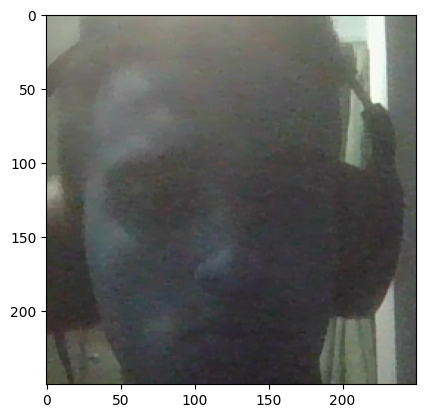

In [18]:
plt.imshow(frame[120:120+250, 250:250+250, :])